In [ ]:
default_path = "/content/drive/MyDrive/demo/"

### Loading Data

In [ ]:
import pandas as pd
import torch
import random
import numpy as np

Training Data

In [ ]:
train = pd.read_csv(default_path+"train.csv")
train.head(10)

,headline,article
0,EXCLUSIVE: दिल्ली में डीजल टैक्सियों पर बैन से...,दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1,जॉर्डन: राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के...,जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...
2,UN में पाकिस्तान की राजदूत मलीहा लोधी ने कराई ...,पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...
3,38 देशों में पीएम नरेंद्र मोदी बायोपिक को रिली...,पीएम नरेंद्र मोदी बायोपिक में विवेक ओबेरॉय ने ...
4,13 अगस्त 2011: दिनभर की बड़ी खबरें पढ़ें,"देश, दुनिया, महानगर, खेल, आर्थिक और बॉलीवुड मे..."
5,एशिया कप से पहले बोला PAK बॉलर- हार के बाद अब ...,पाकिस्तान के तेज गेंदबाज\nहसन अली\nने कहा कि\n...
6,जाट आंदोलन: हरियाणा ने केंद्र से मांगी अर्ध सै...,जाट आंदोलन के बढ़ने की आशंका के बीच हरियाणा की ...
7,"शोरूम मालिक से 5 करोड़ की फिरौती मांगा, BJP सा...",महाराष्ट्र के अहमदनगर एमआईडीसी में फोर्ट शोरूम...
8,चंद्रयान-2 की लॉन्चिंग लाइव देखना है तो यहां क...,भारतीय अंतरिक्ष अनुसंधान संगठन (ISRO) के चंद्र...
9,Dry Day List 2019: जानें- इस साल कब-कब होंगे ड...,आपने शानदार पार्टी के साथ 2019 का आगाज तो कर ल...


In [ ]:
print(train.head(1)["headline"])

0    EXCLUSIVE: दिल्ली में डीजल टैक्सियों पर बैन से...
Name: headline, dtype: object


Testing Data

In [ ]:
test = pd.read_csv(default_path+"test.csv")


In [ ]:
test.head(10)

,headline,article
0,"पठानकोट पहुंचे PM मोदी, एयरबेस का जायजा ले बॉर...",प्रधानमंत्री नरेंद्र मोदी पठानकोट एयरबेस पहुंच...
1,सचिन ने देशवासियों को समर्पित किया अपना दोहरा शतक,सचिन तेंदुलकर ने एकदिवसीय अंतरराष्ट्रीय क्रिके...
2,एनआईए करेगी छत्तीसगढ़ में सुरक्षा खामियों की ज...,केंद्रीय गृह राज्य मंत्री आर. पी. एन. सिंह ने ...
3,सीधी बात: शाह बोले- हमारा बस चलता तो अब तक मं...,भारतीय जनता पार्टी (बीजेपी) के राष्ट्रीय अध्यक...
4,"ऋषभ पंत के पास यूनिक टैलेंट, उसके साथ छेड़छाड़ न...",ऋषभ पंत की कभी कभार इस बात के लिए आलोचना की जा...


In [ ]:
news = pd.concat([train, test], ignore_index=True, sort=False)

### Cleaning

In [ ]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', data)

def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    #text = re.sub(r'(\d+)', r'', text)

    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub(r"[‘’।:]", " ", str(text)) #removing other special characters
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    text = remove_emojis(text)
    return text


In [ ]:
train_data_trg = news['headline']
train_data_src = news['article']

In [ ]:
tokenized_corpus_trg = [preprocess_tokenize(x) for x in train_data_trg]  #these are headlines
tokenized_corpus_src = [preprocess_tokenize(x) for x in train_data_src]  #these are articles

In [ ]:
news.head()

In [ ]:
train_data_trg[1]

'जॉर्डन: राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के संयंत्र का उद्घाटन किया'

In [ ]:
tokenized_corpus_trg[1]

'जॉर्डन राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के संयंत्र का उद्घाटन किया'

In [ ]:
train_data_src[1]

"जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प्रणब मुखर्जी ने 86 करोड़ डॉलर की लागत से निर्मित भारत-जॉर्डन उवर्रक संयंत्र का जॉर्डन के शाह अब्दुल्ला (द्वितीय) इब्न अल हुसैन के साथ उद्घाटन किया. यह संयंत्र एक साल से कम समय में बनकर तैयार हुआ है.\n\n\nराष्ट्रपति मुखर्जी के यहां एयर इंडिया की उड़ान से दोपहर पहुंचने के कुछ देर बाद ही शाह के महल से इस संयंत्र का रिमोट के जरिए उद्घाटन किया गया. अधिकारियों ने बताया कि भारतीय उर्वरक कंपनी इफको और जॉर्डन के फास्फेट्स माइन कंपनी ने इस संयंत्र के लिए 2008 में एक संयुक्त उद्यम कंपनी जॉर्डन इंडिया फर्टिलाइजर कंपनी बनाया. संयुक्त उद्यम में इफको की हिस्सेदारी 52 प्रतिशत है.\n\n\nइस संयंत्र से प्रति वर्ष 450 करोड़ टन सल्फ्यूरिक एसिड और 150 करोड़ टन फास्फेरिक एसिड के उत्पादन का अनुमान है. राष्ट्रपति का इससे पहले यहां पारंपरिक स्वागत किया गया और राष्ट्रपति भवन के सामने उन्हें 21 तोपों की सलामी दी गई. इसके बाद वह शाह अब्दुल्ला (द्वितीय) इब्न अल हुसैन के साथ वार्ता में व्यस्त हो गए. वार्ता के बाद दोनों नेताओं ने इंडो-जर्मन उवर्रक संयंत्र का संयुक्त रूप स

In [ ]:
tokenized_corpus_src[1] #cleaned sentences

'जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प्रणब मुखर्जी ने 86 करोड़ डॉलर की लागत से निर्मित भारत-जॉर्डन उवर्रक संयंत्र का जॉर्डन के शाह अब्दुल्ला द्वितीय इब्न अल हुसैन के साथ उद्घाटन किया यह संयंत्र एक साल से कम समय में बनकर तैयार हुआ है राष्ट्रपति मुखर्जी के यहां एयर इंडिया की उड़ान से दोपहर पहुंचने के कुछ देर बाद ही शाह के महल से इस संयंत्र का रिमोट के जरिए उद्घाटन किया गया अधिकारियों ने बताया कि भारतीय उर्वरक कंपनी इफको और जॉर्डन के फास्फेट्स माइन कंपनी ने इस संयंत्र के लिए 2008 में एक संयुक्त उद्यम कंपनी जॉर्डन इंडिया फर्टिलाइजर कंपनी बनाया संयुक्त उद्यम में इफको की हिस्सेदारी 52 प्रतिशत है इस संयंत्र से प्रति वर्ष 450 करोड़ टन सल्फ्यूरिक एसिड और 150 करोड़ टन फास्फेरिक एसिड के उत्पादन का अनुमान है राष्ट्रपति का इससे पहले यहां पारंपरिक स्वागत किया गया और राष्ट्रपति भवन के सामने उन्हें 21 तोपों की सलामी दी गई इसके बाद वह शाह अब्दुल्ला द्वितीय इब्न अल हुसैन के साथ वार्ता में व्यस्त हो गए वार्ता के बाद दोनों नेताओं ने इंडो-जर्मन उवर्रक संयंत्र का संयुक्त रूप से उद्घाटन किया इस संयं

## **EDA**

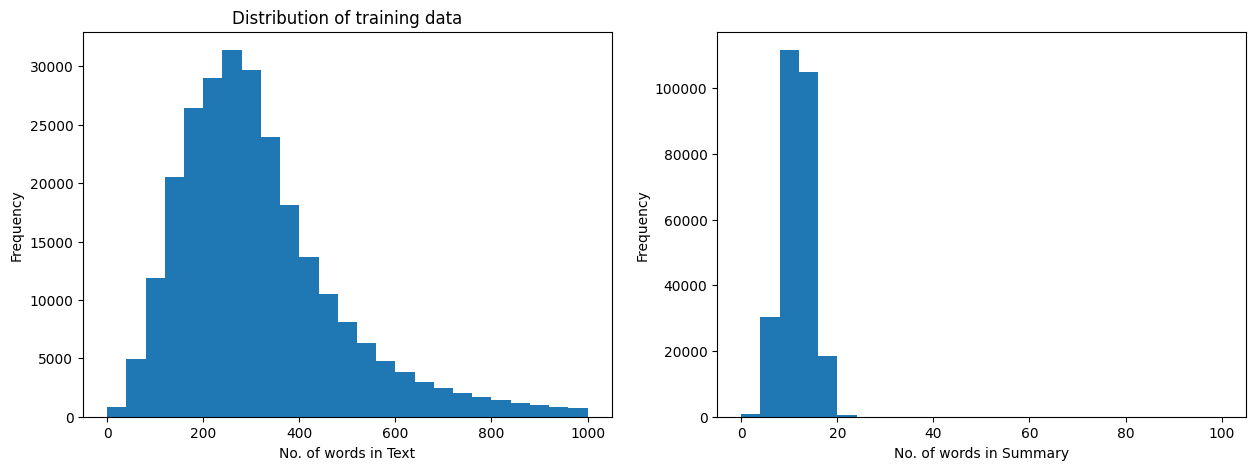

In [ ]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_src[:train.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_trg[:train.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 100])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
ax[0].set_title('Distribution of training data')
plt.show()

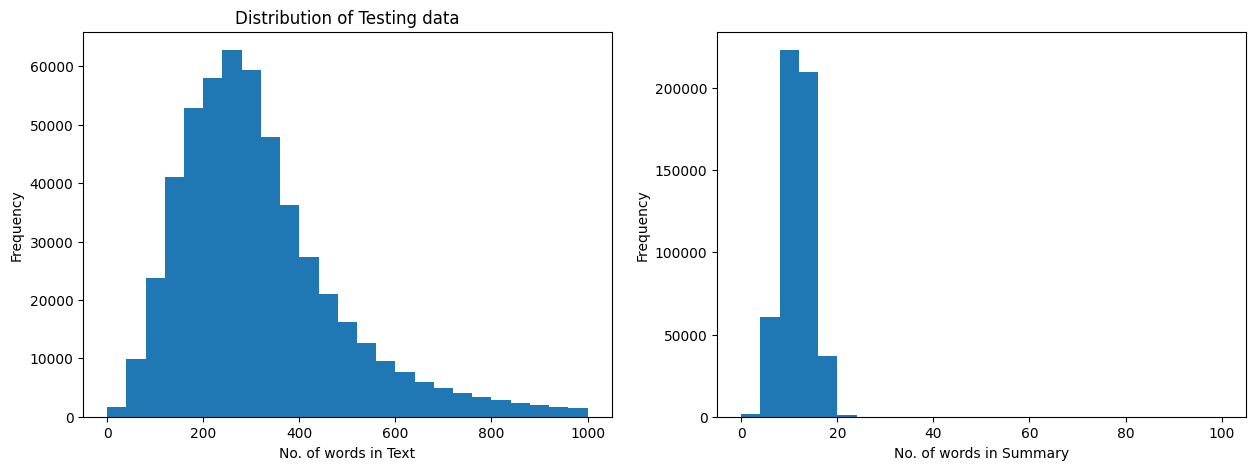

In [ ]:
for i in tokenized_corpus_src[:-test.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_trg[:-test.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 100])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
ax[0].set_title('Distribution of Testing data')
plt.show()

In [ ]:
news['Text_Cleaned'] = tokenized_corpus_src
print("::::: Text_Cleaned :::::")
print(news['Text_Cleaned'][0:5], "\n")


news['Summary_Cleaned'] =  tokenized_corpus_trg
print("::::: Summary :::::")
print(news['Summary_Cleaned'][0:5], "\n")

corpus = list(news['Text_Cleaned'])


::::: Text_Cleaned :::::
0    दिल्ली में सुप्रीम कोर्ट के डीज़ल टैक्सियों को...
1    जॉर्डन के ऐतिहासिक दौरे पर पहुंचे राष्ट्रपति प...
2    पाकिस्तानी नेताओं को विवादित और हास्यास्पद बया...
3    पीएम नरेंद्र मोदी बायोपिक में विवेक ओबेरॉय ने ...
4    देश दुनिया महानगर खेल आर्थिक और बॉलीवुड में क्...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0     दिल्ली में डीजल टैक्सियों पर बैन से मुश्किल म...
1    जॉर्डन राष्ट्रपति मुखर्जी ने 86 करोड़ डॉलर के ...
2     में पाकिस्तान की राजदूत मलीहा लोधी ने कराई फज...
3    38 देशों में पीएम नरेंद्र मोदी बायोपिक को रिली...
4              13 अगस्त 2011 दिनभर की बड़ी खबरें पढ़ें
Name: Summary_Cleaned, dtype: object 



In [ ]:
text_count = []
summary_count = []

for sent in news['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in news['Summary_Cleaned']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

In [ ]:
graph_df['text'].describe()

count    333260.000000
mean        359.302256
std         330.663893
min           0.000000
25%         202.000000
50%         290.000000
75%         408.000000
max       15990.000000
Name: text, dtype: float64

In [ ]:
graph_df['summary'].describe()


count    333260.000000
mean         11.141244
std           3.016140
min           0.000000
25%           9.000000
50%          11.000000
75%          13.000000
max         183.000000
Name: summary, dtype: float64

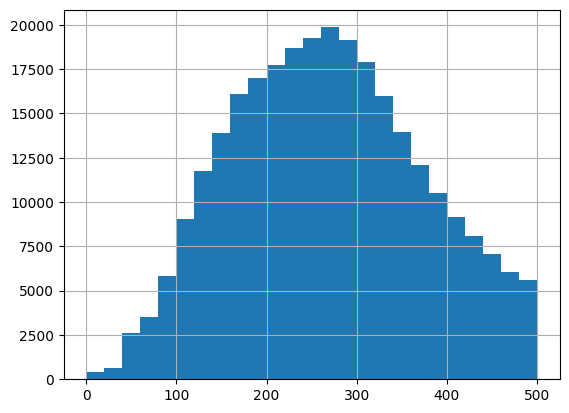

In [ ]:
graph_df['text'].hist(bins = 25, range=(0, 500))
plt.show()


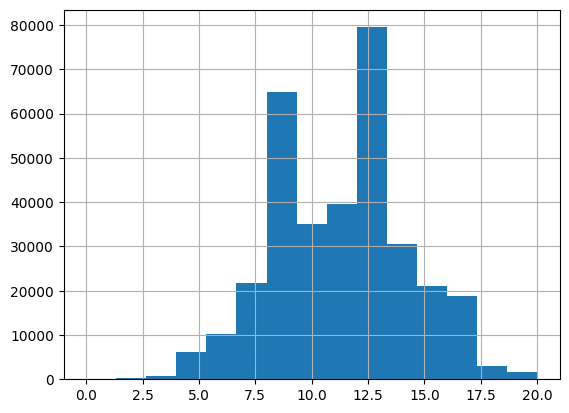

In [ ]:
graph_df['summary'].hist(bins = 15, range=(0, 20))
plt.show()


In [ ]:
count = 0
for i in graph_df['text']:
    if i > 10 and i <= 500:
        count = count + 1
print(count / len(graph_df['text']))


0.8452799615915502


In [ ]:
count = 0
for i in graph_df['summary']:
    if i > 1 and i <= 16:
        count = count + 1
print(count / len(graph_df['summary']))

0.9663475964712237
